In [4]:
import numpy as np
from scipy.special import factorial
from scipy.stats import poisson
import matplotlib.pyplot as plt

# Helper functions

In [463]:
def get_z(mu, phi, max_y):
    Z = 0
    for j in range(max_y):
        left = np.power((mu + (np.exp(phi) - 1)/(2*np.exp(phi))), j*np.exp(phi))
        right = 1/(np.power(factorial(j), np.exp(phi)))
        Z += left * right
    return Z

In [464]:
def cmp_nll(y, mu, phi, max_z):
    left_term1 = np.sum(y*np.log(mu + (np.exp(phi) - 1)/(2*np.exp(phi))))
    left_term2 = np.sum(np.log(factorial(y)))
    left = np.exp(phi)*(left_term1 - left_term2)
    right = np.sum(np.log(get_z(mu, phi, max_y=max_z)))
    ll = left - right
    return -ll

In [465]:
def cmp_nll_uni(params, y):
    mu, phi = params
    first = y*np.exp(phi)*np.log(mu + (np.exp(phi) - 1)/(2*np.exp(phi)))
    second = np.log(factorial(y))
    third = np.log(get_z(mu, phi, int(1.5*y.max())))
    ll = first - second - third
    total_ll = np.sum(ll)
    return -total_ll

In [466]:
def cmp_pmf(mu, phi, y, max_y=30):
    Z = get_z(mu, phi,max_y=max_y)
    exponent = y*np.exp(phi)
    left = np.power((mu + (np.exp(phi) - 1)/(2*np.exp(phi))), exponent)
    right = np.power((factorial(y)), -np.exp(phi))/Z
    
    return left * right

# Univariate Example

In [467]:
mu_true = 10.0
rv = poisson(mu_true)

In [468]:
y = rv.rvs(1000)

(array([  8.,  78., 145., 239., 248., 156.,  70.,  32.,  14.,  10.]),
 array([ 2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22.]),
 <BarContainer object of 10 artists>)

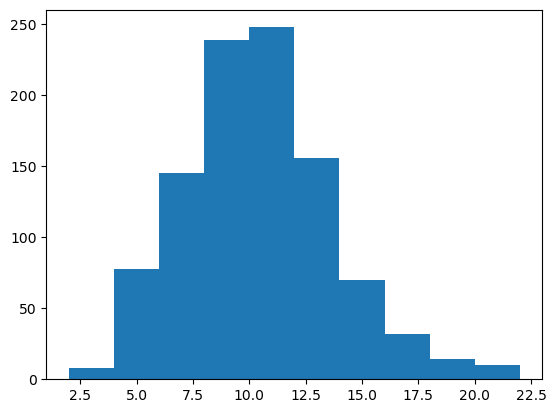

In [469]:
plt.hist(y)

In [470]:
mus = np.linspace(1, 40, 100)

In [471]:
max_z = int(2*y.mean())

### Grid Search: known phi, uknown mu

In [472]:
like = []
phi_true = 0.0
for m in mus:
    like.append(cmp_nll_uni([m,phi_true], y))

Text(0, 0.5, 'NLL')

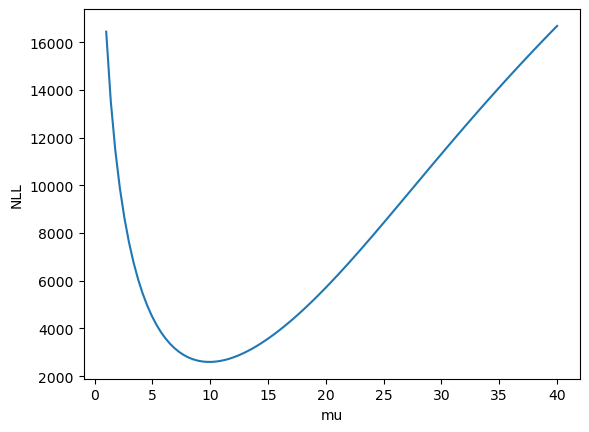

In [473]:
plt.plot(mus, like)
plt.xlabel("mu")
plt.ylabel("NLL")

### Grid search: known mu, unkown phi

In [474]:
like = []
phis = np.linspace(-2, 3, 100)
for p in phis:
    like.append(cmp_nll_uni([mu_true,p], y))

/var/folders/w5/203pqh9x1h5089n8fqdq8j3w0000gn/T/ipykernel_12393/525426748.py:5: RuntimeWarning: overflow encountered in power
  right = 1/(np.power(factorial(j), np.exp(phi)))
/var/folders/w5/203pqh9x1h5089n8fqdq8j3w0000gn/T/ipykernel_12393/525426748.py:4: RuntimeWarning: overflow encountered in power
  left = np.power((mu + (np.exp(phi) - 1)/(2*np.exp(phi))), j*np.exp(phi))
/var/folders/w5/203pqh9x1h5089n8fqdq8j3w0000gn/T/ipykernel_12393/525426748.py:6: RuntimeWarning: invalid value encountered in double_scalars
  Z += left * right


Text(0, 0.5, 'NLL')

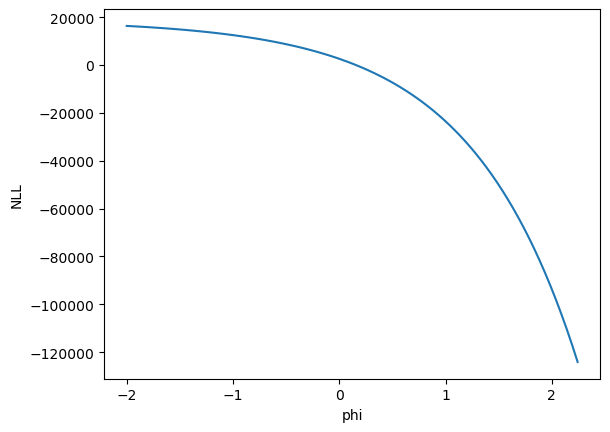

In [475]:
plt.plot(phis, like)
plt.xlabel("phi")
plt.ylabel("NLL")

In [485]:
mu = 10.0
phi = 3.0

In [486]:
max_y = int(y.max()*2)

In [487]:
Z_arr=[]
Z = 0
for j in range(max_y):
    left = np.power((mu + (np.exp(phi) - 1)/(2*np.exp(phi))), j*np.exp(phi))
    right = 1/(np.power(factorial(j), np.exp(phi)))
    Z += left * right
    Z_arr.append(Z)

/var/folders/w5/203pqh9x1h5089n8fqdq8j3w0000gn/T/ipykernel_12393/1666344586.py:4: RuntimeWarning: overflow encountered in power
  left = np.power((mu + (np.exp(phi) - 1)/(2*np.exp(phi))), j*np.exp(phi))
/var/folders/w5/203pqh9x1h5089n8fqdq8j3w0000gn/T/ipykernel_12393/1666344586.py:5: RuntimeWarning: overflow encountered in power
  right = 1/(np.power(factorial(j), np.exp(phi)))
/var/folders/w5/203pqh9x1h5089n8fqdq8j3w0000gn/T/ipykernel_12393/1666344586.py:6: RuntimeWarning: invalid value encountered in double_scalars
  Z += left * right


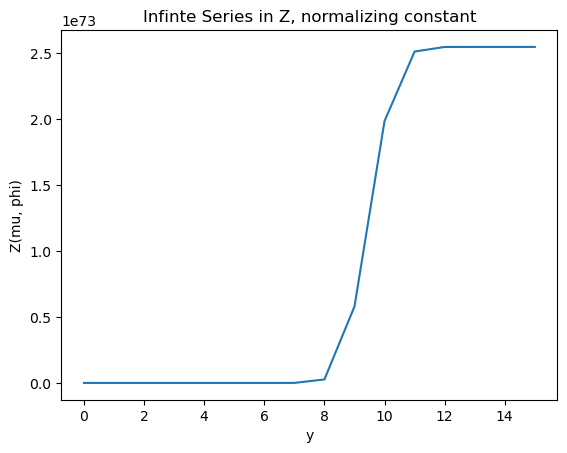

In [489]:
plt.title("Infinte Series in Z, normalizing constant")
plt.plot(np.arange(0, max_y), Z_arr)
plt.xlabel("y")
plt.ylabel("Z(mu, phi)")
plt.show()

In [490]:
y_grid = np.arange(0, int(y.max())+ 1)

In [482]:
mu_star = 10
mu_star = mus[np.argmin(like)]
phi_star = 0

In [483]:
mu_star

34.484848484848484

In [439]:
density = cmp_pmf(mu_star, phi_star, y_grid)

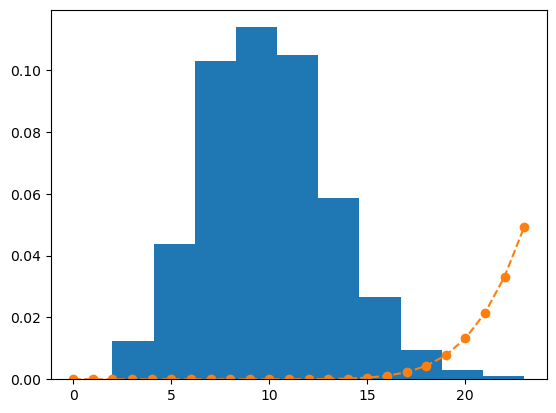

In [440]:
plt.hist(y, density=True)
plt.plot(y_grid, density, linestyle='--', marker='o')
plt.show()

### Scipy optimizer

In [441]:
from scipy.optimize import minimize

In [442]:
bounds = ((0, None), (-2, 2))

In [335]:
res = minimize(cmp_nll_uni, x0=[3.0, 0.0], bounds=bounds, args=(y))

In [336]:
res

      fun: -96978.82074443191
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.45519140e-03, -1.14457525e+05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 33
      nit: 8
     njev: 11
   status: 0
  success: True
        x: array([10.13891443,  2.        ])

In [337]:
mu_star, phi_star = res.x

In [338]:
density = cmp_pmf(mu_star, phi_star, y_grid)

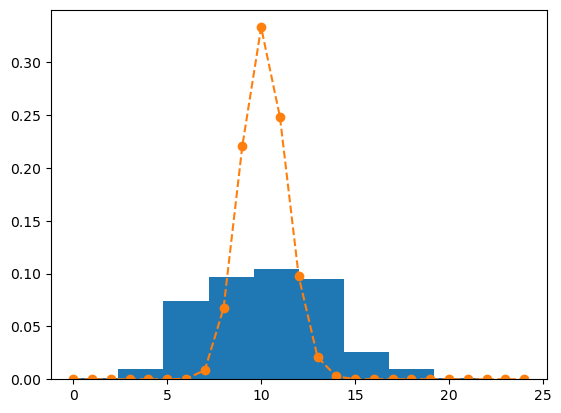

In [339]:
plt.hist(y, density=True)
plt.plot(y_grid, density, linestyle='--', marker='o')
plt.show()